C:\Users\felin\Downloads\python\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
578/578 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.4125 - loss: 1.2963 - val_accuracy: 0.5543 - val_loss: 1.0675
Epoch 2/10
578/578 ━━━━━━━━━━━━━━━━━━━━ 18s 32ms/step - accuracy: 0.5869 - loss: 1.0018 - val_accuracy: 0.6109 - val_loss: 0.9552
Epoch 3/10
578/578 ━━━━━━━━━━━━━━━━━━━━ 18s 32ms/step - accuracy: 0.6431 - loss: 0.8823 - val_accuracy: 0.6296 - val_loss: 0.9142
Epoch 4/10
578/578 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.6666 - loss: 0.8215 - val_accuracy: 0.6609 - val_loss: 0.8502
Epoch 5/10
578/578 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - accuracy: 0.7018 - loss: 0.7551 - val_accuracy: 0.6693 - val_loss: 0.8220
Epoch 6/10
578/578 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.7251 - loss: 0.7087 - val_accuracy: 0.6835 - val_loss: 0.7996
Epoch 7/10
578/578 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - accuracy: 0.7379 - loss: 0.6710 - val_accuracy: 0.6837 - val_loss: 0.8152
Epoch 8/10
578/578 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - accuracy: 0.7527 - loss: 0.6298 - 

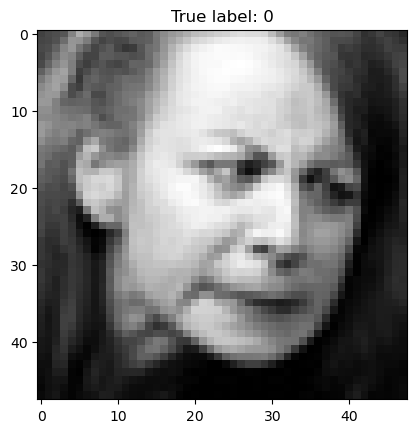

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
Predicted class: 2, Confidence: 0.8114204406738281


In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Load data
X_train = np.load(r"C:\Users\felin\Downloads\gesture_detection-20241122T185354Z-001\gesture_detection\train_validation\train_gesture.npy")
y_train = np.load(r"C:\Users\felin\Downloads\gesture_detection-20241122T185354Z-001\gesture_detection\train_validation\train_gesture_labels.npy")
X_val = np.load(r"C:\Users\felin\Downloads\gesture_detection-20241122T185354Z-001\gesture_detection\train_validation\validation_gesture.npy")
y_val = np.load(r"C:\Users\felin\Downloads\gesture_detection-20241122T185354Z-001\gesture_detection\train_validation\validation_gesture_labels.npy")

# Normalize data
X_train, X_val = X_train / 255.0, X_val / 255.0

# Reshape data for model input (48x48 grayscale)
X_train = X_train.reshape(-1, 48, 48, 1)
X_val = X_val.reshape(-1, 48, 48, 1)

# Build the model
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(48, 48, 1)),
    MaxPool2D(2, 2),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPool2D(2, 2),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPool2D(2, 2),
    Flatten(),
    Dense(4, activation='softmax')  # 4 classes for emotions
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

# Test the model (show prediction for one image)
plt.imshow(X_val[0].reshape(48, 48), cmap='gray')
plt.title(f"True label: {y_val[0]}")
plt.show()

# Predict and display result
pred = model.predict(X_val[0].reshape(1, 48, 48, 1))
predicted_class = np.argmax(pred)
confidence = pred[0][predicted_class]
print(f'Predicted class: {predicted_class}, Confidence: {confidence}')
